In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('boston_housing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [5]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


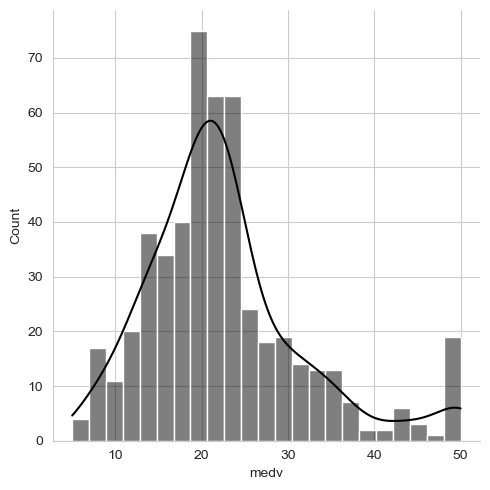

In [11]:
sns.set_style('whitegrid')
sns.displot(data= df.medv, kde= True, color='black')


<Axes: >

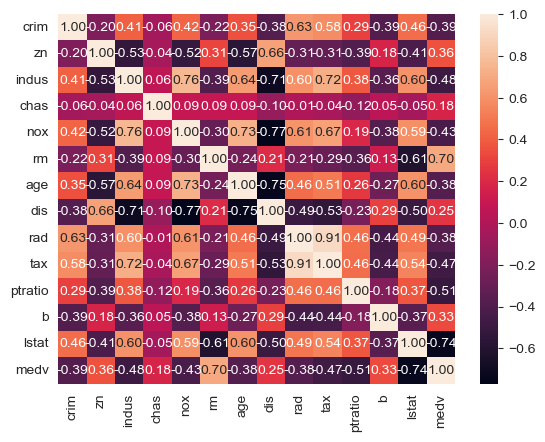

In [12]:
sns.heatmap(data= df.corr(), annot= True, fmt= '0.2f')

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

scaler= StandardScaler()

x= df.drop(['medv'], axis= 1)
y=df['medv']

x= scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

regressor= LinearRegression()

regressor.fit(x_train, y_train)

y_pred= regressor.predict(x_test)

In [24]:
accuracy= r2_score(y_test, y_pred)
mse= mean_squared_error(y_test, y_pred)
mae= mean_absolute_error(y_test, y_pred)
rmse= np.sqrt(mse)


In [25]:
print(accuracy)
print(mse)
print(rmse)
print(mae)

0.7112260057484927
21.51744423117725
4.638689926172825
3.162709871457409


<Axes: xlabel='medv'>

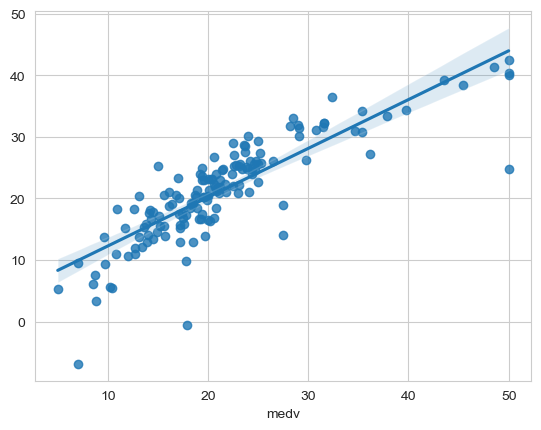

In [26]:
sns.regplot(x=y_test, y= y_pred)

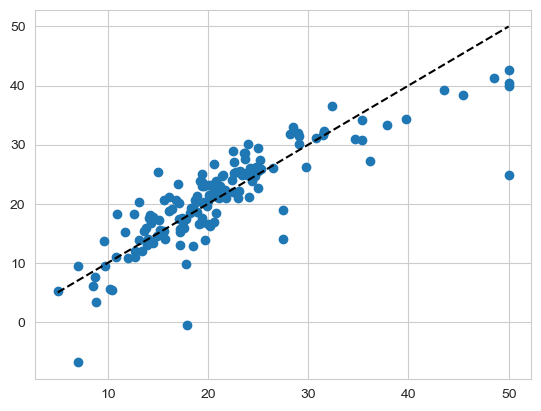

In [27]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle= '--', color= 'black')

In [28]:
regressor.intercept_

22.50945471291038

In [30]:
regressor.coef_[0]

-1.146914112977061

<Axes: >

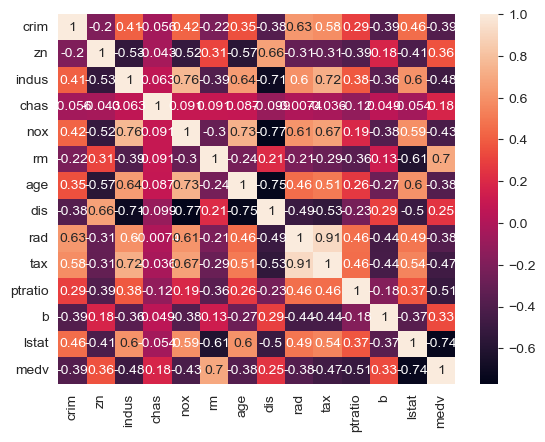

In [34]:
sns.heatmap(df.corr(), annot= True)

In [59]:
j= 0
for i in df.columns:
    print(i, " ", j)
    j=j+1

crim   0
zn   1
indus   2
chas   3
nox   4
rm   5
age   6
dis   7
rad   8
tax   9
ptratio   10
b   11
lstat   12
medv   13


In [60]:
x1= df.iloc[:,[2,4,5,9,10,12]]
y1=y
x1= scaler.fit_transform(x1)

In [61]:
x1_train, x1_test, y1_train, y1_test= train_test_split(x1, y1, test_size=0.25, random_state=42)
regressor1= LinearRegression()
regressor1.fit(x1_train, y1_train)
y1_pred= regressor1.predict(x1_test)

accuracy1= r2_score(y1_test,y1_pred)


In [62]:
accuracy1

0.6280941083861222

<Axes: xlabel='medv'>

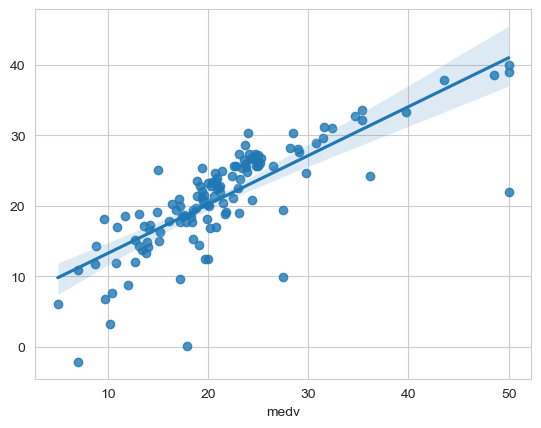

In [63]:
sns.regplot(x= y1_test, y= y1_pred)